# --------------------------------- Experiment 2 DATA ANALYSIS ---------------------------------

### Link do podsumowania i opisów:
https://docs.google.com/document/d/1EJS4VNvU7QPxjEvYc-keg6CIpknSgNK07MdYV779hFo/edit#

In [52]:
import numpy as np
import pandas as pd
import os
import os.path as op
import glob
from scipy import stats

In [53]:
# to be used later in statistics

from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [54]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# PTH = r"C:\PhD_SoA_Study\senofag\notebooks\Experiment_2_data"
PTH = r"D:\PROCEDURY\senofag\notebooks\Experiment_2_data"

In [56]:
fls = glob.glob(op.join(PTH, '*.csv'))
fls[:3]

['D:\\PROCEDURY\\senofag\\notebooks\\Experiment_2_data\\SoA_1_AniaNowe_prime_detection_1.csv',
 'D:\\PROCEDURY\\senofag\\notebooks\\Experiment_2_data\\SoA_1_AniaNowe_prime_detection_2.csv',
 'D:\\PROCEDURY\\senofag\\notebooks\\Experiment_2_data\\SoA_1_AniaNowe_settings.csv']

# ------------- Tests -------------

## 1 blok, jedna osoba

In [57]:
# Below at home:
# for idx, val in enumerate(fls):
#     print(idx, val.split('\\')[6])

# Below in the lab:
for idx, val in enumerate(fls):
    print(idx, val.split('\\')[5])

(0, 'SoA_1_AniaNowe_prime_detection_1.csv')
(1, 'SoA_1_AniaNowe_prime_detection_2.csv')
(2, 'SoA_1_AniaNowe_settings.csv')
(3, 'SoA_1_Ania_prime_detection_block_1.csv')
(4, 'SoA_1_Ania_prime_detection_block_2.csv')
(5, 'SoA_1_Ania_prime_detection_block_3.csv')
(6, 'SoA_1_Ania_prime_detection_block_4.csv')
(7, 'SoA_1_Ania_regular_block_1.csv')
(8, 'SoA_1_Ania_regular_block_2.csv')
(9, 'SoA_1_Ania_regular_block_3.csv')
(10, 'SoA_1_Ania_regular_block_4.csv')
(11, 'SoA_1_Ania_settings.csv')
(12, 'SoA_1_Ania_training.csv')
(13, 'SoA_1_Julia_prime_detection_1.csv')
(14, 'SoA_1_Julia_prime_detection_2.csv')
(15, 'SoA_1_Julia_regular_block_1.csv')
(16, 'SoA_1_Julia_regular_block_2.csv')
(17, 'SoA_1_Julia_regular_block_3.csv')
(18, 'SoA_1_Julia_regular_block_4.csv')
(19, 'SoA_1_Julia_settings.csv')
(20, 'SoA_1_Julia_training.csv')
(21, 'SoA_1_Kasmir_prime_detection_1.csv')
(22, 'SoA_1_Kasmir_prime_detection_2.csv')
(23, 'SoA_1_Kasmir_regular_block_1.csv')
(24, 'SoA_1_Kasmir_regular_block_2.csv'

In [58]:
df = pd.read_csv(os.path.join(PTH, fls[15]), sep=',')
df.head()

,Unnamed: 0,cond,choiceType,prime,target,effect,corrResp,resp,pos,block,fixTime,ifcorr,RT,soa_rating,rating_RT,delay1,delay2,ITI,saveTime
0,1,incomp,Cued,prime_right.png,target_left.png,green,d,d,-5.0,1,127,True,0.434825,2,4.112,50.0,104.0,39.0,0.003236
1,2,incomp,Cued,prime_left.png,target_right.png,blue,l,l,-5.0,1,128,True,0.516340,3,2.772,48.0,112.0,72.0,0.003186
2,3,comp,Cued,prime_left.png,target_left.png,yellow,d,d,5.0,1,117,True,0.514343,2,3.263,41.0,94.0,45.0,0.003352
3,4,incomp,Free,prime_left.png,target_both.png,blue,dl,l,-5.0,1,100,True,0.768286,2,1.982,42.0,109.0,47.0,0.003257
4,5,comp,Cued,prime_left.png,target_left.png,yellow,d,d,-5.0,1,113,True,0.494917,2,1.762,49.0,106.0,27.0,0.003310


In [59]:
# sns.violinplot('cond', 'RT', data=df.query('ifcorr == True'))
# sns.swarmplot('cond', 'RT', data=df.query('ifcorr == True'), edgecolor='white', lw=1)

In [60]:
# sns.distplot(df.query('ifcorr == True').query('cond == "incomp"').RT, hist=False, kde_kws=dict(shade=True), color='blue')
# sns.distplot(df.query('ifcorr == True').query('cond == "comp"').RT, hist=False, kde_kws=dict(shade=True), color='green')

In [61]:
# sns.distplot(df.query('ifcorr == True').query('cond == "incomp"').query('subject_nr == "Ania"').query('choiceType == "Free"').soa_rating, hist=False, kde_kws=dict(shade=False), color='blue')
# sns.distplot(df.query('ifcorr == True').query('cond == "comp"').query('subject_nr == "Ania"').soa_rating, hist=False, kde_kws=dict(shade=False), color='green')

In [62]:
# sns.swarmplot(x="subject_nr", y="soa_rating", hue="cond", data=df)

# ------------- DataFrame preparation (SoA & RT) -------------

In [63]:
df = pd.DataFrame()
for file in fls:
    # Below at home:
#     split_file = file.split('\\')[6]
    # Below in the lab:
    split_file = file.split('\\')[5]
    if 'regular' in split_file:
        person_nr = split_file.split('_')[2]
        group_nr = int(split_file.split('_')[1])
        
        # FIXME - przy nowych danych można usunąć "block_nr"
        block_nr = split_file.split('_')[-1].split('.')[0]
        df_person = pd.read_csv(os.path.join(PTH, file), sep=',')
        df_person.loc[:, 'subject_nr'] = person_nr
        df_person.loc[:, 'block_nr'] = block_nr
        df_person.loc[:, 'group_nr'] = group_nr
        df = df.append(df_person, ignore_index=True)

print("Number of rows =", len(df.index))
print("Number of persons =", len(np.unique(df['subject_nr'])))
print("Persons' numbers =", np.unique(df['subject_nr']))
df.head()

('Number of rows =', 2661)
('Number of persons =', 4)
("Persons' numbers =", array(['Ania', 'Janek', 'Julia', 'Kasmir'], dtype=object))


,Unnamed: 0,cond,choiceType,prime,target,effect,corrResp,resp,pos,block,...,RT,soa_rating,rating_RT,delay1,delay2,ITI,saveTime,subject_nr,block_nr,group_nr
0,1,comp,Free,prime_right.png,target_both.png,yellow,dl,l,-250.0,0,...,0.721364,1,3.792,49.0,80.0,51.0,0.003105,Ania,1,1
1,2,incomp,Cued,prime_left.png,target_right.png,red,l,l,-250.0,0,...,0.590706,2,5.534,43.0,101.0,43.0,0.002641,Ania,1,1
2,3,incomp,Cued,prime_right.png,target_left.png,green,d,d,250.0,0,...,0.395420,7,3.463,44.0,82.0,63.0,0.002622,Ania,1,1
3,4,comp,Free,prime_right.png,target_both.png,yellow,dl,l,250.0,0,...,0.438955,1,3.443,57.0,123.0,52.0,0.002589,Ania,1,1
4,5,comp,Free,prime_right.png,target_both.png,yellow,dl,l,250.0,0,...,0.586520,7,3.152,44.0,106.0,70.0,0.002716,Ania,1,1


# ------------- Data Visualization (SoA & RT) ------------- 

## ****** SoA rating ******

### A pointplot for all subjects

Text(0.5,1,"SoA, Warunek 'Cued'")

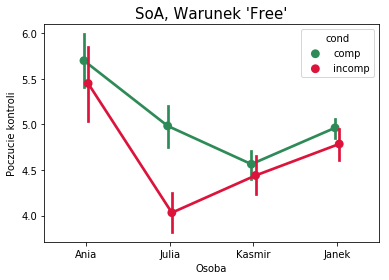

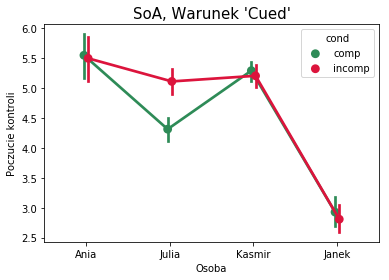

In [64]:
plt.figure(1)
axis = sns.pointplot(x='subject_nr', y='soa_rating', hue='cond', data=df.query('ifcorr == True').query('choiceType == "Free"'), 
              palette=('seagreen', 'crimson'), dodge=True)
axis.set_ylabel("Poczucie kontroli")
axis.set_xlabel("Osoba")
axis.set_title("SoA, Warunek 'Free'", fontsize=15)

plt.figure(2)
axis = sns.pointplot(x='subject_nr', y='soa_rating', hue='cond', data=df.query('ifcorr == True').query('choiceType == "Cued"'), 
              palette=('seagreen', 'crimson'), hue_order=('comp', 'incomp'), dodge=True)
axis.set_ylabel("Poczucie kontroli")
axis.set_xlabel("Osoba")
axis.set_title("SoA, Warunek 'Cued'", fontsize=15)

### Plots for particular subjects - SoA rating


In [65]:
for num, name in enumerate(np.unique(df['subject_nr'])):
    plt.figure(num)
    subject = df.query('ifcorr == True').query('subject_nr == "{}"'.format(name))
    axis = sns.pointplot(x='choiceType', y='soa_rating', order=('Cued', 'Free'), hue='cond', hue_order=('comp', 'incomp'), 
                         data=subject, palette=('seagreen', 'crimson'), dodge=True)
    axis.set_title('{}, grupa {}, SoA'.format(name, str(np.unique(subject.group_nr))[2]), fontsize=15)
    axis.set_ylabel("Poczucie kontroli")
    axis.set_xlabel("Rodzaj strzałki")

Error in callback <function post_execute at 0x000000000C5A9908> (for post_execute):


ValueError: matplotlib display text must have all code points < 128 or use Unicode strings

ValueError: matplotlib display text must have all code points < 128 or use Unicode strings

<Figure size 432x288 with 1 Axes>

ValueError: matplotlib display text must have all code points < 128 or use Unicode strings

<Figure size 432x288 with 1 Axes>

ValueError: matplotlib display text must have all code points < 128 or use Unicode strings

<Figure size 432x288 with 1 Axes>

ValueError: matplotlib display text must have all code points < 128 or use Unicode strings

<Figure size 432x288 with 1 Axes>

## SoA rating divided by blocks for each subject - FIXME

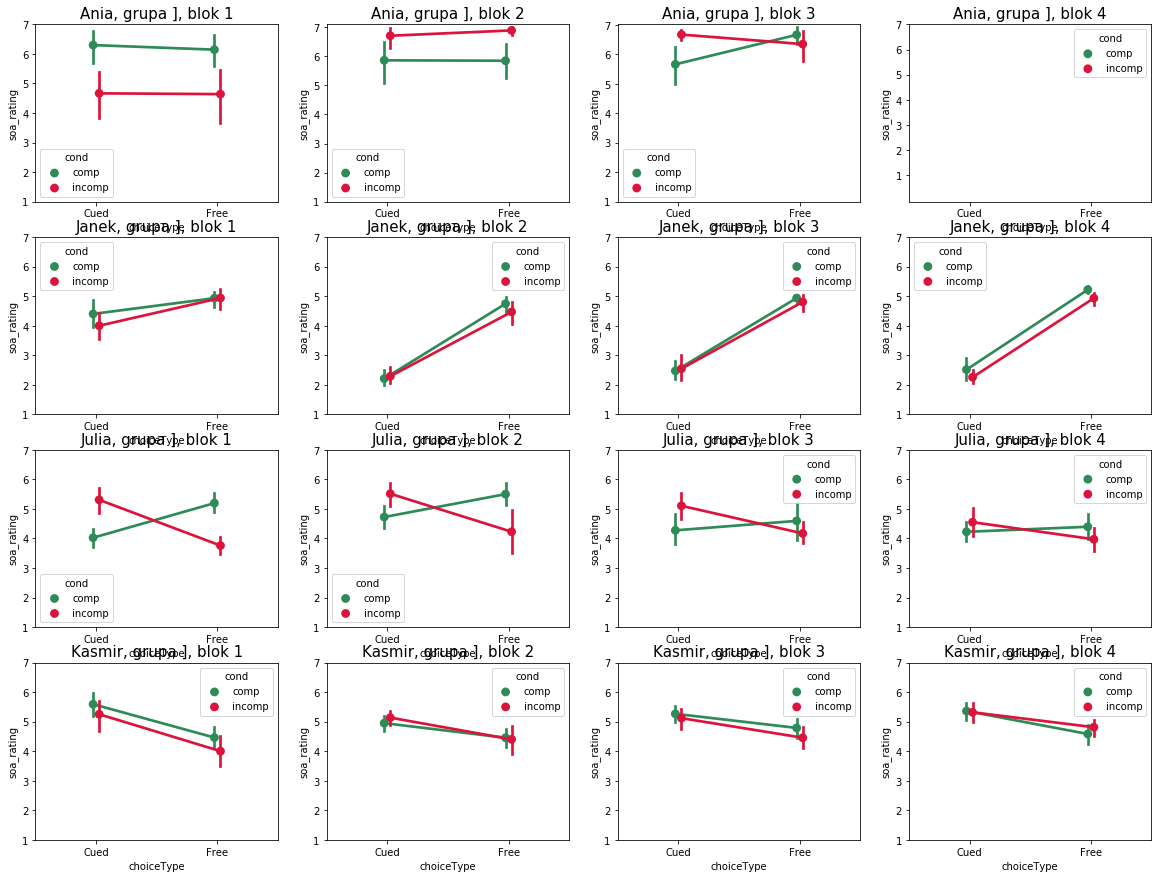

In [66]:
# Create a figure to be filled with plots
fig, ax = plt.subplots(ncols=4, nrows=len(np.unique(df['subject_nr'])), figsize=(20, 15))

# Iterate through subjects and blocks and fill the figure
for num, name in enumerate(np.unique(df['subject_nr'])):
    
    # choose a proper subject
    subject = df.query('ifcorr == True').query('subject_nr == "{}"'.format(name))
    
    # plot for each block
    plt1 = sns.pointplot(x='choiceType', y='soa_rating', order=('Cued', 'Free'), hue='cond', hue_order=('comp', 'incomp'), 
                         data=subject.query('block == 1'), palette=('seagreen', 'crimson'), dodge=True,
                         ax=ax[num][0])
    plt2 = sns.pointplot(x='choiceType', y='soa_rating', order=('Cued', 'Free'), hue='cond', hue_order=('comp', 'incomp'), 
                         data=subject.query('block == 2'), palette=('seagreen', 'crimson'), dodge=True,
                         ax=ax[num, 1])
    plt3 = sns.pointplot(x='choiceType', y='soa_rating', order=('Cued', 'Free'), hue='cond', hue_order=('comp', 'incomp'), 
                         data=subject.query('block == 3'), palette=('seagreen', 'crimson'), dodge=True,
                         ax=ax[num, 2])
    plt4 = sns.pointplot(x='choiceType', y='soa_rating', order=('Cued', 'Free'), hue='cond', hue_order=('comp', 'incomp'), 
                         data=subject.query('block == 4'), palette=('seagreen', 'crimson'), dodge=True,
                         ax=ax[num, 3])
    
    # set labels and ticks
    x = range(1, 8)
    plt1.set_yticks(x)
    plt1.set_title('{}, grupa {}, blok {}'.format(name, str(np.unique(subject.group_nr))[2], 1), fontsize=15)
    plt2.set_yticks(x)
    plt2.set_title('{}, grupa {}, blok {}'.format(name, str(np.unique(subject.group_nr))[2], 2), fontsize=15)
    plt3.set_yticks(x)
    plt3.set_title('{}, grupa {}, blok {}'.format(name, str(np.unique(subject.group_nr))[2], 3), fontsize=15)
    plt4.set_yticks(x)
    plt4.set_title('{}, grupa {}, blok {}'.format(name, str(np.unique(subject.group_nr))[2], 4), fontsize=15)

## ****** RT ******

Text(0.5,1,"RT, Warunek 'Cued'")

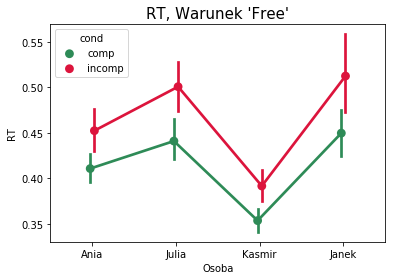

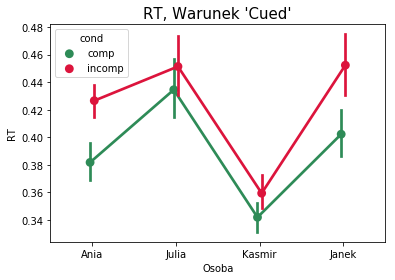

In [67]:
plt.figure(1)
axis = sns.pointplot(x='subject_nr', y='RT', hue='cond', data=df.query('ifcorr == True').query('choiceType == "Free"'), 
              palette=('seagreen', 'crimson'), dodge=True)
axis.set_ylabel("RT")
axis.set_xlabel("Osoba")
axis.set_title("RT, Warunek 'Free'", fontsize=15)

plt.figure(2)
axis = sns.pointplot(x='subject_nr', y='RT', hue='cond', data=df.query('ifcorr == True').query('choiceType == "Cued"'), 
              palette=('seagreen', 'crimson'), hue_order=('comp', 'incomp'), dodge=True)
axis.set_ylabel("RT")
axis.set_xlabel("Osoba")
axis.set_title("RT, Warunek 'Cued'", fontsize=15)

### Plots for particular subjects - RT

In [68]:
for num, name in enumerate(np.unique(df['subject_nr'])):
    plt.figure(num)
    subject = df.query('ifcorr == True').query('subject_nr == "{}"'.format(name))
    axis = sns.pointplot(x='choiceType', y='RT', order=('Cued', 'Free'), hue='cond', hue_order=('comp', 'incomp'), 
                         data=subject, palette=('seagreen', 'crimson'), dodge=True)
    axis.set_title('{}, RT, grupa {}'.format(name, str(np.unique(subject.group_nr))[2]), fontsize=15)
    axis.set_ylabel("RT")
    axis.set_xlabel("Rodzaj strzałki")

Error in callback <function post_execute at 0x000000000C5A9908> (for post_execute):


ValueError: matplotlib display text must have all code points < 128 or use Unicode strings

ValueError: matplotlib display text must have all code points < 128 or use Unicode strings

<Figure size 432x288 with 1 Axes>

ValueError: matplotlib display text must have all code points < 128 or use Unicode strings

<Figure size 432x288 with 1 Axes>

ValueError: matplotlib display text must have all code points < 128 or use Unicode strings

<Figure size 432x288 with 1 Axes>

ValueError: matplotlib display text must have all code points < 128 or use Unicode strings

<Figure size 432x288 with 1 Axes>

# ------------- DataFrame preparation (prime detection) -------------

In [70]:
df = pd.DataFrame()
for file in fls:
    # Below at home:
#     split_file = file.split('\\')[6]
    # Below in the lab:
    split_file = file.split('\\')[5]
    if 'prime' in split_file:
        person_nr = split_file.split('_')[2]
        group_nr = split_file.split('_')[1]
        block_nr = split_file.split('_')[-1].split('.')[0]
        
        df_person = pd.read_csv(os.path.join(PTH, file), sep=',')
        
        df_person.loc[:, 'subject_nr'] = person_nr
        df_person.loc[:, 'block_nr'] = block_nr
        df_person.loc[:, 'group_nr'] = group_nr
        df = df.append(df_person, ignore_index=True)

df['ifcorr'] = df['ifcorr'].map({False:0, True:1})

print("Number of rows =", len(df.index))
print("Number of persons =", len(np.unique(df['subject_nr'])))
print("Persons' numbers =", np.unique(df['subject_nr']))
df.head()

('Number of rows =', 1344)
('Number of persons =', 5)
("Persons' numbers =", array(['Ania', 'AniaNowe', 'Janek', 'Julia', 'Kasmir'], dtype=object))


,Unnamed: 0,cond,choiceType,prime,target,effect,corrResp,resp,pos,block,fixTime,ifcorr,RT,soa_rating,rating_RT,ITI,saveTime,subject_nr,block_nr,group_nr
0,1,comp,Free,prime_right.png,target_both.png,NaN,l,d,5.0,1,116,0,0.256492,0,0.0,63.0,0.010284,AniaNowe,1,1
1,2,incomp,Cued,prime_left.png,target_right.png,cross,d,NoResp,-5.0,1,140,0,NaN,0,0.0,75.0,0.009709,AniaNowe,1,1
2,3,comp,Cued,prime_right.png,target_right.png,cross,l,NoResp,-5.0,1,150,0,NaN,0,0.0,71.0,0.008893,AniaNowe,1,1
3,4,comp,Cued,prime_right.png,target_right.png,NaN,l,d,-5.0,1,147,0,0.028873,0,0.0,57.0,0.008901,AniaNowe,1,1
4,5,incomp,Free,prime_left.png,target_both.png,NaN,d,l,-5.0,1,143,0,0.220566,0,0.0,49.0,0.008738,AniaNowe,1,1


# ------------- Data Visualization (prime detection) ------------- 

## Prime detection task - simple ratio of correct/incorrect identification of the arrow direction

In [71]:
print('Ratio correct/incorrect dla osoby:')

for num, name in enumerate(np.unique(df['subject_nr'])):
    subject = df.query('corrResp != "space"').query('subject_nr == "{}"'.format(name))
    print('osoba nr {} = {}'.format(name, np.mean(subject.ifcorr)))

Ratio correct/incorrect dla osoby:
osoba nr Ania = 0.546875
osoba nr AniaNowe = 0.510416666667
osoba nr Janek = 0.328125
osoba nr Julia = 0.442708333333
osoba nr Kasmir = 0.59375


## Prime detection task - applying signal detection theory